# PROJECT 2: Phishing Detector with Logistic Regression

In [ ]:
#CellStrat - Load the phishing website dataset (this dataset has 11000+ data samples). Each sample has 30 website
#parameters and then a class label identifying it as a phishing website or not (1 or -1).

#The task is to train a KNN and Logistic Regression classifier which can detect phishing websites.

#Using 70% data for training and 30% for testing.

#Train the model using training data and then use it to predict the test data.

#Then print the count of misclassified samples in the test data prediction as well as the accuracy score of this prediction.

### Import modules

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### Define Input and Output

In [2]:
phishing = np.loadtxt('phishing.txt', delimiter=',')

#attribute having_IP_Address  { -1,1 }
#attribute URL_Length   { 1,0,-1 }
#attribute Shortining_Service { 1,-1 }
#attribute having_At_Symbol   { 1,-1 }
#attribute double_slash_redirecting { -1,1 }
#attribute Prefix_Suffix  { -1,1 }
#attribute having_Sub_Domain  { -1,0,1 }
#attribute SSLfinal_State  { -1,1,0 }
#attribute Domain_registeration_length { -1,1 }
#attribute Favicon { 1,-1 }
#attribute port { 1,-1 }
#attribute HTTPS_token { -1,1 }
#attribute Request_URL  { 1,-1 }
#attribute URL_of_Anchor { -1,0,1 }
#attribute Links_in_tags { 1,-1,0 }
#attribute SFH  { -1,1,0 }
#attribute Submitting_to_email { -1,1 }
#attribute Abnormal_URL { -1,1 }
#attribute Redirect  { 0,1 }
#attribute on_mouseover  { 1,-1 }
#attribute RightClick  { 1,-1 }
#attribute popUpWidnow  { 1,-1 }
#attribute Iframe { 1,-1 }
#attribute age_of_domain  { -1,1 }
#attribute DNSRecord   { -1,1 }
#attribute web_traffic  { -1,0,1 }
#attribute Page_Rank { -1,1 }
#attribute Google_Index { 1,-1 }
#attribute Links_pointing_to_page { 1,0,-1 }
#attribute Statistical_report { -1,1 }
#attribute Result  { -1,1 }

In [3]:
phishing.shape

(11055L, 31L)

### Create X and Y data

In [4]:
#X = phishing[:, [1, 5]]
X = phishing[:, 0:30]
y = phishing[:,30:31]
print('Class labels:', np.unique(y))


# Splitting data into 70% training and 30% test data:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
                                                    random_state=1, stratify=y)
y_train = np.array(y_train.ravel())
y_test = np.array(y_test.ravel())


('Class labels:', array([-1.,  1.]))


### Train and Evaluate Data

In [5]:
#from sklearn.linear_model import LogisticRegression

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.2f' % knn.score(X_test, y_test))

Misclassified samples: 211
Accuracy: 0.94
Accuracy: 0.94


# Exercise 1

In [ ]:
#Build a phishing website classifier using Logistic Regression with “C” parameter = 100.
#Use 70% of data as training data and remaining 30% as test data.
#Print count of misclassified samples in the test data prediction as
#well as the accuracy score of the model.

In [6]:
# Logistic Regression import and build

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 100)

In [7]:
#Already done above
#Splitting the dataset:

X = phishing[:, 0:30]
y = phishing[:,30:31]
print('Class labels:', np.unique(y))

# Splitting data into 70% training and 30% test data:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
                                                    random_state=1, stratify=y)
y_train = np.array(y_train.ravel())
y_test = np.array(y_test.ravel())

('Class labels:', array([-1.,  1.]))


In [9]:
# Logistic Regression fit and prediction
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)

# Misclassification and accuracy score
print('Misclassified samples: %d' % (y_test != y_pred1).sum())
print('Accuracy of the test with predicted: %.2f' % accuracy_score(y_test, y_pred1))
print('Accuracy Score of the model on the test set: %.2f' % lr.score(X_test, y_test))

Misclassified samples: 249
Accuracy of the test with predicted: 0.92
Accuracy Score of the model on the test set: 0.92


In [ ]:
# INFERENCE: The Logistic Regression model with 'C' parameter = 100 doesn't perform as good as KNN on the test set and predictions
# We can find out how this matches with the train set.

In [10]:
print('Accuracy Score of the model on the train set(LogitR): %.2f' % lr.score(X_train, y_train))
print('Accuracy Score of the model on the train set(KNN): %.2f' % knn.score(X_train, y_train))

Accuracy Score of the model on the train set(LogitR): 0.93
Accuracy Score of the model on the train set(KNN): 0.96


# Exercise 2

In [ ]:
#Train with only two input parameters - parameter Prefix_Suffix and 13 URL_of_Anchor.
#Check accuracy using the test data and compare the accuracy with the previous value.
#Plot the test samples along with the decision boundary when trained with index 5 and index 13 parameters.

In [11]:
# Selecting the columns Prefix_Suffix and 13 URL_of_Anchor
# Prefix_Suffix = Column 5
# URL_of_Anchor = Column 13
X = phishing[:, [5, 13]]

In [12]:
X.shape

(11055L, 2L)

In [15]:
# Splitting the new X and y into 70% training and 30% test data:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
                                                    random_state=1, stratify=y)
y_train = np.array(y_train.ravel())
y_test = np.array(y_test.ravel())

In [16]:
# Using Logistic Regression still using the parameter "C" = 100
lr.fit(X_train, y_train)
y_pred2 = lr.predict(X_test)

print('Misclassified samples: %d' % (y_test != y_pred2).sum())
print('Accuracy of the test with predicted: %.2f' % accuracy_score(y_test, y_pred2))
print('Accuracy Score of the model on the test set: %.2f' % lr.score(X_test, y_test))

Misclassified samples: 543
Accuracy of the test with predicted: 0.84
Accuracy Score of the model on the test set: 0.84


In [ ]:
# Training with just the Prefix_Suffix and URL_of_Anchor shows a reduced accuracy though inversely shows that these 2 features
# have high correlation with whether it is a phishing account or not a phishing account.
# We can also see that Logistic Regression with just the 2 features misclassified 543 samples showing it definitely still needs
# the rest of the data to properly identify the target.

In [17]:
#Import some libraries for plotting, the ListedColormap for color maps and the %matplotlib inline for inline plot printing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline

In [18]:
# Scale the data to allow for stacking and avoid improper weightage on the LR formula
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [51]:
#Create a decision regions function for plotting the decision regions 
def plot_decision_regions(X, y, classifier, test_idx=None, resolution = 0.02):
    #Setup marker generation and color map
    markers = ("s", "x", "o,", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                   y=X[y == cl, 1],
                   alpha = 0.8,
                   c = cmap(idx),
                   marker=markers[idx],
                   label=cl,
                   edgecolor='black')
        #Highlight test samples
    if test_idx:
        #plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0],
                   X_test[:, 1],
                   c = '',
                   edgecolor='black',
                   alpha = 1.0,
                   linewidth=1,
                   marker = 'o',
                   s=100,
                   label='test set')

In [21]:
# Stack up the sets 
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [38]:
#Training the logistic regression model with scikit_learn
lr = LogisticRegression(C=100.0, random_state = 1)
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

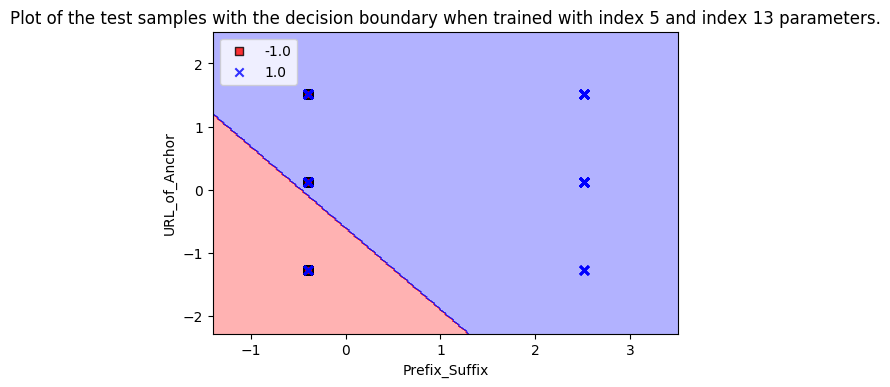

In [52]:
# Plotting the boundaries
plot_decision_regions(X_combined_std, y_combined, classifier = lr, test_idx=range(105, 150))
plt.title('Plot of the test samples with the decision boundary when trained with index 5 and index 13 parameters.')
plt.xlabel('Prefix_Suffix')
plt.ylabel('URL_of_Anchor')
plt.legend(loc='upper left')
#plt.savefig('phishing_image_region.png', dpi = 300)
plt.show()